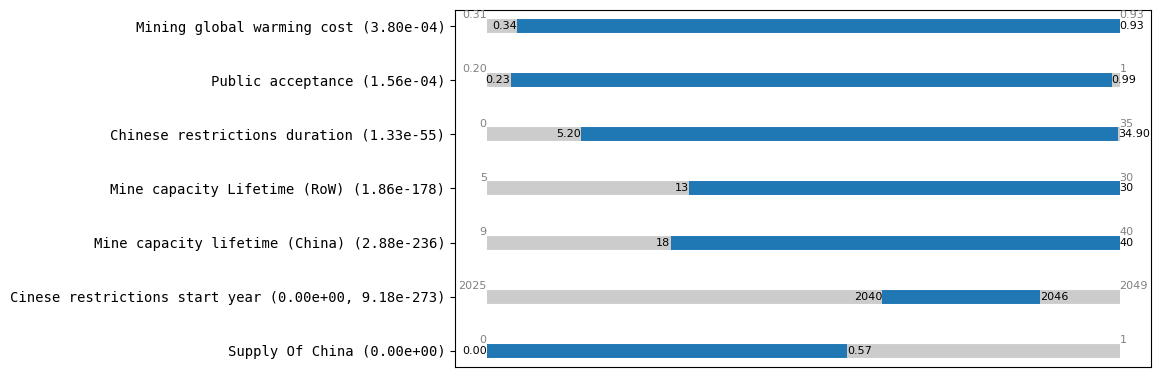

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Data
data = {
    "Parameter name": ["Supply Of China", "Cinese restrictions start year", "Mine capacity lifetime (China)", "Mine capacity Lifetime (RoW)", "Chinese restrictions duration", "Public acceptance", "Mining global warming cost"],
    "Minimum value of its range": [0, 2025, 9, 5, 0, 0.2, 0.31],
    "Maximum value of its range": [1, 2049, 40, 30, 35, 1, 0.93],
    "Actual minimum value identified by PRIM analysis": [0.000031, 2040, 18, 13, 5.2, 0.23, 0.34],
    "Actual maximum value identified by PRIM analysis": [0.569962, 2046, 40, 30, 34.9, 0.99, 0.93],
    "qp value min": [float('nan'), 0.0, 2.883471e-236, 1.855263e-178, 1.334891e-55, 1.559194e-04, 3.799835e-04],
    "qp value max": [0.0, 9.176206e-273, float('nan'), float('nan'), float('nan'), float('nan'), float('nan')]
}

# Create DataFrame
df = pd.DataFrame(data)

# Normalize the actual values to the equal-length bar scale (0 to 1)
df['Normalized min'] = (df['Actual minimum value identified by PRIM analysis'] - df['Minimum value of its range']) / (df['Maximum value of its range'] - df['Minimum value of its range'])
df['Normalized max'] = (df['Actual maximum value identified by PRIM analysis'] - df['Minimum value of its range']) / (df['Maximum value of its range'] - df['Minimum value of its range'])

# Function to format labels
def format_label(value):
    if pd.isna(value):
        return ""
    elif float(value).is_integer():
        return f"{int(value)}"
    else:
        return f"{value:.2f}"

# Custom colormap for actual range bars
cmap = LinearSegmentedColormap.from_list("custom_cmap", [(0, "#1f77b4"), (1, "#1f77b4")])

# Adjust figure size based on the number of parameters
fig, ax = plt.subplots(figsize=(12, len(df) * 0.6))

# Plot the full range as empty bars with equal length
for i, row in df.iterrows():
    ax.plot([0, 1], [i, i], 'k-', alpha=0.2, linewidth=10, solid_capstyle='butt')
    # Add labels for the full range values above the bar
    ax.text(0, i + 0.2, format_label(row['Minimum value of its range']), 
            verticalalignment='center', horizontalalignment='right', fontsize=8, color='gray')
    ax.text(1, i + 0.2, format_label(row['Maximum value of its range']), 
            verticalalignment='center', horizontalalignment='left', fontsize=8, color='gray')

# Plot the actual range as filled bars normalized to the 0-1 scale
for i, row in df.iterrows():
    ax.plot([row['Normalized min'], row['Normalized max']], [i, i], '-', linewidth=10, solid_capstyle='butt', color=cmap(0.5))
    # Add labels for actual min and max values
    ax.text(row['Normalized min'], i, format_label(row['Actual minimum value identified by PRIM analysis']), 
            verticalalignment='center', horizontalalignment='right', fontsize=8, color='black')
    ax.text(row['Normalized max'], i, format_label(row['Actual maximum value identified by PRIM analysis']), 
            verticalalignment='center', horizontalalignment='left', fontsize=8, color='black')

# Add qp values next to the parameter names
y_labels = []
for param, qp_min, qp_max in zip(df['Parameter name'], df['qp value min'], df['qp value max']):
    if pd.isna(qp_min) and pd.isna(qp_max):
        y_labels.append(f"{param}")
    elif pd.isna(qp_min):
        y_labels.append(f"{param} ({qp_max:.2e})")
    elif pd.isna(qp_max):
        y_labels.append(f"{param} ({qp_min:.2e})")
    else:
        y_labels.append(f"{param} ({qp_min:.2e}, {qp_max:.2e})")

ax.set_yticks(range(len(df)))
ax.set_yticklabels(y_labels, fontfamily='monospace')

# Customize the plot
ax.set_xticks([])  # Remove the numbers on the x-axis
ax.set_xlabel('')
#ax.set_title('Normalized Parameter Ranges and Actual Values Identified by PRIM Analysis')
ax.grid(False)  # Remove all grid lines

# Add legend
legend_elements = [
    plt.Line2D([0], [0], color='k', alpha=0.2, linewidth=10, solid_capstyle='butt', label='Full range'),
    plt.Line2D([0], [0], color=cmap(0.5), linewidth=10, solid_capstyle='butt', label='Actual range')
]
#ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

# Adjust spacing between bars
plt.subplots_adjust(left=0.4, right=0.98, top=0.95, bottom=0.1)

# Export the plot to a PDF file
#plt.savefig('parameter_ranges.pdf', bbox_inches='tight')

# Show plot
plt.show()

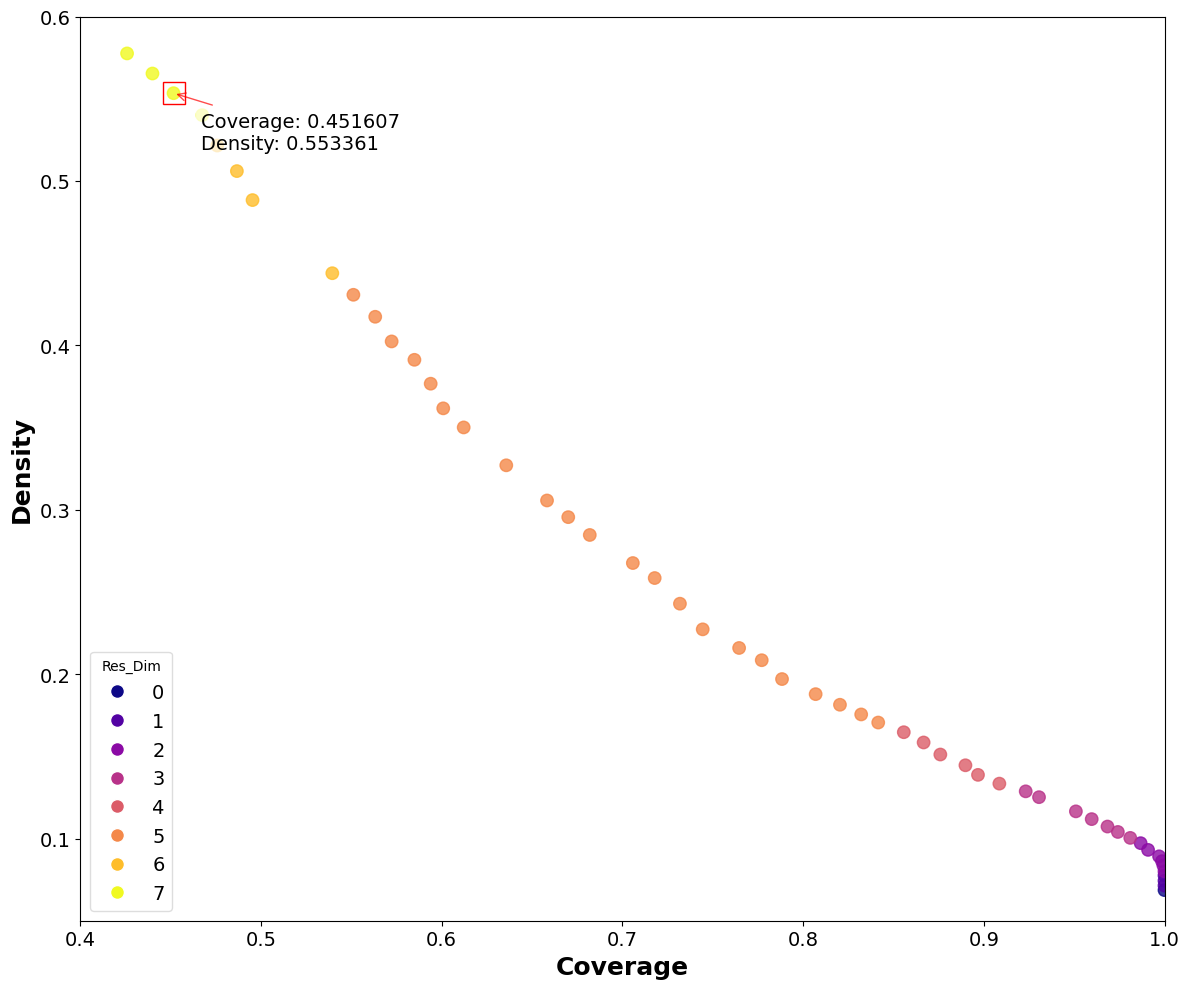

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Defining the data
coverage = [1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.999400, 0.998628, 0.997000, 0.990913, 0.986798,
            0.981054, 0.974196, 0.968453, 0.959709, 0.950964, 0.930562, 0.923189, 0.908616, 0.896785, 0.889841,
            0.875954, 0.866695, 0.855722, 0.841577, 0.832147, 0.820403, 0.806944, 0.788341, 0.777111, 0.764595,
            0.744449, 0.731847, 0.717874, 0.705787, 0.681955, 0.670039, 0.658294, 0.635748, 0.612173, 0.600857,
            0.593913, 0.584912, 0.572310, 0.563223, 0.551136, 0.539477, 0.495328, 0.486670, 0.475782, 0.467467,
            0.451607, 0.439949, 0.425889]

density = [0.068618, 0.071358, 0.074326, 0.077569, 0.080049, 0.083569, 0.086215, 0.089171, 0.093092, 0.097175,
           0.100384, 0.103994, 0.107286, 0.111805, 0.116523, 0.125153, 0.128702, 0.133391, 0.138718, 0.144552,
           0.151096, 0.158419, 0.164660, 0.170547, 0.175476, 0.181360, 0.187824, 0.196992, 0.208458, 0.215904,
           0.227235, 0.242832, 0.258441, 0.267566, 0.284636, 0.295479, 0.305620, 0.327013, 0.350049, 0.361662,
           0.376645, 0.391182, 0.402363, 0.417355, 0.430725, 0.443857, 0.488337, 0.505971, 0.521519, 0.540008,
           0.553361, 0.565323, 0.577540]

res_dim = [0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
           5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7]

# Creating the DataFrame
df = pd.DataFrame({
    "coverage": coverage,
    "density": density,
    "res_dim": res_dim
})

# Creating the plot with increased figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting the tradeoff curve with color coding based on restricted dimensions (res_dim)
#scatter = ax.scatter(df['coverage'], df['density'], c=df['res_dim'], cmap='viridis', marker='o', s=80, alpha=0.8)
scatter = ax.scatter(df['coverage'], df['density'], c=df['res_dim'], cmap='plasma', marker='o', s=80, alpha=0.8)

# Plotting the point with red outline at index 50
ax.plot(df['coverage'][50], df['density'][50], 'ks', markerfacecolor='none', ms=16, markeredgecolor='red', label='Index 50')

# Adding labels, title, and legend with increased font sizes
ax.set_xlabel('Coverage', fontsize=18, fontweight='bold')
ax.set_ylabel('Density', fontsize=18, fontweight='bold')
#ax.set_title('Coverage-Density Tradeoff Curve', fontsize=20, fontweight='bold')

# Increase the font size of the tick labels
plt.tick_params(axis='both', which='major', labelsize=14)

# Creating a legend for restricted dimensions with increased font size
unique_res_dim = sorted(df['res_dim'].unique())
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'{dim}',
                              markerfacecolor=scatter.cmap(scatter.norm(dim)), markersize=10)
                   for dim in unique_res_dim]
ax.legend(handles=legend_elements, title='Res_Dim', fontsize=14, loc='lower left',
          frameon=True, fancybox=True, shadow=False, framealpha=0.65)

# Setting the grid
#ax.grid(True, linestyle='--', alpha=0.7)

# Adding the label for the selected box with minimal borders and more transparency
selected_index = 50
label_text = f"Coverage: {df['coverage'][selected_index]:.6f}\nDensity: {df['density'][selected_index]:.6f}"
ax.annotate(label_text, xy=(df['coverage'][selected_index], df['density'][selected_index]),
            xytext=(20, -40), textcoords='offset points', fontsize=14, color='black',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='none', alpha=0.7),
            arrowprops=dict(arrowstyle='->', color='red', linewidth=1, alpha=0.7))

# Set the limits of the axes to focus on the relevant region
ax.set_xlim(0.4, 1.0)
ax.set_ylim(0.05, 0.6)

# Adjusting the layout and displaying the plot
fig.tight_layout()

# Saving the plot as a PDF file
#plt.savefig('coverage_density_plot.pdf')

# Displaying the plot
plt.show()

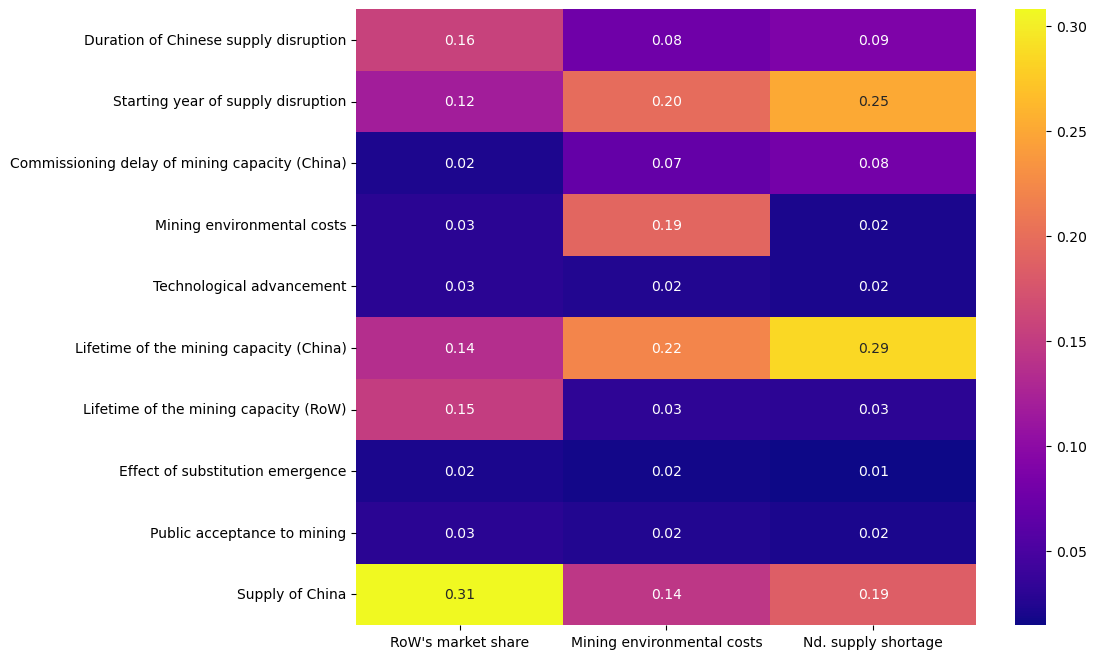

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pandas DataFrame from the data provided
data = {
    "RoW's market share": {
        "Duration of Chinese supply disruption": 0.155575,
        "Starting year of supply disruption": 0.118642,
        "Commissioning delay of mining capacity (China)": 0.021667,
        "Mining environmental costs": 0.028539,
        "Technological advancement": 0.029202,
        "Lifetime of the mining capacity (China)": 0.136053,
        "Lifetime of the mining capacity (RoW)": 0.152012,
        "Effect of substitution emergence": 0.020888,
        "Public acceptance to mining": 0.029490,
        "Supply of China": 0.307934
    },
    "Mining environmental costs": {
        "Duration of Chinese supply disruption": 0.076584,
        "Starting year of supply disruption": 0.198834,
        "Commissioning delay of mining capacity (China)": 0.069247,
        "Mining environmental costs": 0.192235,
        "Technological advancement": 0.024515,
        "Lifetime of the mining capacity (China)": 0.221562,
        "Lifetime of the mining capacity (RoW)": 0.030648,
        "Effect of substitution emergence": 0.017609,
        "Public acceptance to mining": 0.024171,
        "Supply of China": 0.144593
    },
    "Nd. supply shortage": {
        "Duration of Chinese supply disruption": 0.088482,
        "Starting year of supply disruption": 0.251724,
        "Commissioning delay of mining capacity (China)": 0.080296,
        "Mining environmental costs": 0.021425,
        "Technological advancement": 0.021179,
        "Lifetime of the mining capacity (China)": 0.286122,
        "Lifetime of the mining capacity (RoW)": 0.030333,
        "Effect of substitution emergence": 0.014597,
        "Public acceptance to mining": 0.020831,
        "Supply of China": 0.185010
    }
}

# Convert the dictionary to DataFrame
df = pd.DataFrame(data)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='plasma', fmt=".2f")
#plt.title('Impact Heatmap')
# Export the plot to a PDF file
#plt.savefig('heat_map.pdf', bbox_inches='tight')
plt.show()


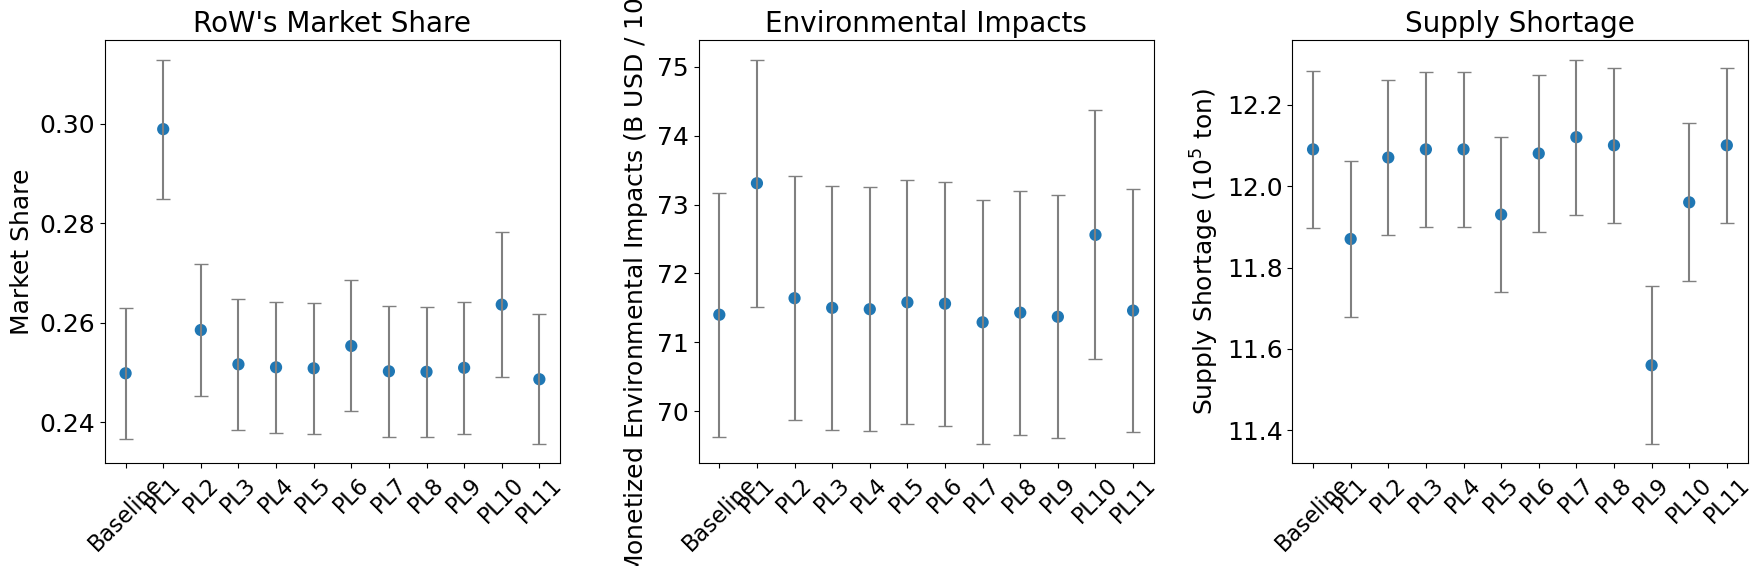

In [4]:
import pandas as pd
from scipy.stats import t
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_confidence_interval(row, confidence_level=0.95):
    sample_size = 1000
    degrees_of_freedom = sample_size - 1
    critical_value = t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
    standard_error = row['std'] / (sample_size ** 0.5)
    margin_of_error = critical_value * standard_error
    lower_bound = row['mean'] - margin_of_error
    upper_bound = row['mean'] + margin_of_error
    return lower_bound, upper_bound

data = {
    'Grouped Policy': ['Baseline', 'PL1', 'PL2', 'PL3', 'PL4', 'PL5', 'PL6', 'PL7', 'PL8', 'PL9', 'PL10', 'PL11'] * 3,
    'Metric': ['RoW\'s Market Share'] * 12 + ['Environmental Impacts'] * 12 + ['Supply Shortage'] * 12,
    'mean': [0.2498, 0.2989, 0.2585, 0.2516, 0.2510, 0.2508, 0.2553, 0.2502, 0.2501, 0.2509, 0.2636, 0.2486] +
            [71.40, 73.31, 71.64, 71.50, 71.48, 71.58, 71.56, 71.29, 71.43, 71.37, 72.56, 71.46] +
            [12.09, 11.87, 12.07, 12.09, 12.09, 11.93, 12.08, 12.12, 12.10, 11.56, 11.96, 12.10],
    'std': [0.2114, 0.2255, 0.2151, 0.2131, 0.2123, 0.2113, 0.2124, 0.2120, 0.2114, 0.2134, 0.2348, 0.2103] +
           [28.59, 28.96, 28.58, 28.53, 28.51, 28.58, 28.61, 28.53, 28.54, 28.46, 29.13, 28.44] +
           [3.12, 3.10, 3.08, 3.08, 3.08, 3.08, 3.09, 3.07, 3.07, 3.12, 3.13, 3.07]
}

df = pd.DataFrame(data)
df = df.set_index(['Metric', 'Grouped Policy'])
df[['Lower Bound', 'Upper Bound']] = df.apply(lambda row: pd.Series(calculate_confidence_interval(row)), axis=1)

metrics = ['RoW\'s Market Share', 'Environmental Impacts', 'Supply Shortage']

# Setting global font size to a larger value
plt.rcParams.update({'font.size': 18})  # Increase global font size

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    ax = axes[i]
    data = df.loc[metric].reset_index()
    sns.pointplot(x='Grouped Policy', y='mean', data=data, join=False, capsize=.2, ax=ax)
    ax.errorbar(data['Grouped Policy'], data['mean'], 
                yerr=[data['mean'] - data['Lower Bound'], data['Upper Bound'] - data['mean']], 
                fmt='none', c='gray', capsize=5)
    ax.set_xticklabels(data['Grouped Policy'], rotation=45, fontsize=16)  # Larger font size for x-tick labels
    ax.set_title(metric, fontsize=20)  # Larger font size for title
    ax.set_xlabel('')  

    # Rename y-axes labels with larger font sizes
    if metric == 'RoW\'s Market Share':
        ax.set_ylabel('Market Share', fontsize=18)
    elif metric == 'Environmental Impacts':
        ax.set_ylabel('Monetized Environmental Impacts (B USD / $10^5$ ton)', fontsize=18)
    elif metric == 'Supply Shortage':
        ax.set_ylabel('Supply Shortage ($10^5$ ton)', fontsize=18)

plt.tight_layout()  
#plt.savefig('Conf_Int.pdf') 
plt.show()
